In [1]:
from base64 import b64encode, b64decode
from binascii import hexlify
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

### Challenge 1

In [2]:
x = "49276d206b696c6c696e6720796f757220627261696e206c696b65206120706f69736f6e6f7573206d757368726f6f6d"
hex = bytes.fromhex(x)
print(b64encode(hex))

b'SSdtIGtpbGxpbmcgeW91ciBicmFpbiBsaWtlIGEgcG9pc29ub3VzIG11c2hyb29t'


### Challenge 2

In [3]:
def xor(a, b):
    return bytes([x^y for (x, y) in zip(a,b)])

In [4]:
x = "1c0111001f010100061a024b53535009181c"
y = "686974207468652062756c6c277320657965"

x = bytes.fromhex(x)
y = bytes.fromhex(y)

print(hexlify(xor(x,y)))

b'746865206b696420646f6e277420706c6179'


### Challenge 3

In [5]:
def counter_hist(expected_counts, act_counts):
    labels, vals1 = zip(*expected_counts.most_common())
    labels += ('\\x',)
    vals1 += (0, )
    vals1 = [val / sum(vals1) for val in vals1]
    vals2 = [act_counts[label] for label in labels[:-1]]
    vals2 += (sum([act_counts[label] for label in act_counts.keys() if label not in labels]), )
    vals2 = [val / sum(vals2) for val in vals2]
    plt.xticks(np.arange(len(labels)), labels)
    plt.bar(np.arange(len(labels)), vals1, align='center')
    plt.bar(np.arange(len(labels)), vals2, color='g', width=0.5, align='center')
    plt.show()

In [6]:
freq = {' ': 20, 
        'e': 12.70, 
        't': 9.06, 
        'a': 8.17, 
        'o': 7.51, 
        'i': 6.97, 
        'n': 6.75, 
        's': 6.33, 
        'h': 6.09, 
        'r': 5.99, 
        'd': 4.25, 
        'l': 4.03, 
        'c': 2.78, 
        'u': 2.76, 
        'm': 2.41, 
        'w': 2.36, 
        'f': 2.23, 
        'g': 2.02, 
        'y': 1.97, 
        'p': 1.93, 
        'b': 1.29, 
        'v': 0.98, 
        'k': 0.77, 
        'j': 0.15, 
        'x': 0.15, 
        'q': 0.10, 
        'z': 0.07}
freq = Counter(freq)


def get_score(y):
    return sum([(0 if chr(b).lower() not in freq else freq[chr(b).lower()]) for b in y])


def plot_msg_hist(y):
    ltrs = Counter()
    for i in range(len(y)):
        ltrs[chr(y[i])] += 1
    counter_hist(freq, ltrs)
        

def best_msg_score(x):
    best_score = -float('inf')
    for c in range(256):
        y = bytes([b ^ c for b in x])
        score = get_score(y)
        if score >= best_score:
            best_letter = chr(c)
            best_score = score
            msg = y
    return best_letter, best_score, msg

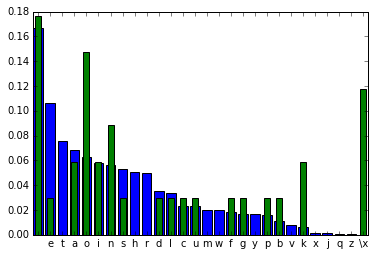

X b"Cooking MC's like a pound of bacon"


In [7]:
x = "1b37373331363f78151b7f2b783431333d78397828372d363c78373e783a393b3736"
x = bytes.fromhex(x)

best_letter, _, msg = best_msg_score(x)
plot_msg_hist(msg)
print(best_letter, msg)

### Challenge 4

In [8]:
with open('4.txt', 'r') as file:
    lines = file.read().splitlines()
    
best_score = -float('inf')
for line in lines:
    line = bytes.fromhex(line)
    letter, score, y = best_msg_score(line)
    if score >= best_score:
        best_score = score
        msg = y
print(msg)

b'Now that the party is jumping\n'


### Challenge 5

In [9]:
def key_xor(msg, key):
    stream = key * (len(msg) // len(key)) + key[:(len(msg) % len(key))]
    return xor(msg, stream)

In [10]:
msg = "Burning 'em, if you ain't quick and nimble\nI go crazy when I hear a cymbal"

key = "ICE"

msg = msg.encode('ascii')
key = key.encode('ascii')

print(hexlify(key_xor(msg, key)))

b'0b3637272a2b2e63622c2e69692a23693a2a3c6324202d623d63343c2a26226324272765272a282b2f20430a652e2c652a3124333a653e2b2027630c692b20283165286326302e27282f'


### Challenge 6

In [11]:
def num_bits(x):
    x = int(x)
    count = 0
    while x:
        count += (x & 1)
        x >>= 1
    return count
    

def dist(b1, b2):
    return sum([num_bits(x^y) for x, y in zip(b1, b2)])

In [12]:
dist(bytes('this is a test', 'ascii'), bytes('wokka wokka!!!', 'ascii'))

37

[29 15 38 13 11 25 40  9 20 16 33 14 22 36 12  5 17 18 31 26 32 39 30  7
 34  8 10  2 21 37  3 35 23 27 28 19 24  6  4]


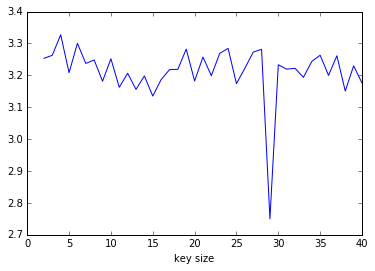

In [13]:
with open('6.txt', 'r') as file:
    data = b64decode(''.join(file.readlines()))

s_vals = []
for keysize in range(2, 41):
    chunks = int(len(data)/40)
    s = 0
    for i in range(chunks):
        s += dist(data[i*keysize:(i+1)*keysize], data[(i+1)*keysize:(i+2)*keysize])
    s /= (chunks * keysize)
    s_vals.append(s)
        
plt.xlabel('key size')
plt.plot(range(2, 41), s_vals)
print(np.argsort(s_vals) + 2)

In [14]:
KEYSIZE = 29

blocks = []
for k in range(KEYSIZE):
    blocks.append([])
    for i in range(k, len(data), KEYSIZE):
        blocks[k].append(data[i])
    blocks[k] = bytes(blocks[k])
        
letters = []
for block in blocks:
    letter, _, _ = best_msg_score(block)
    letters.append(letter)
    
key = bytes([ord(letter) for letter in letters])

b'Terminator X: Bring the noise'


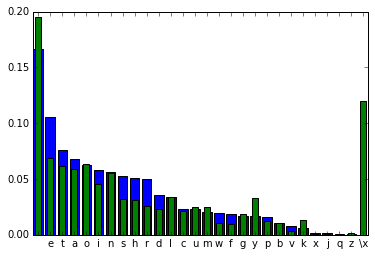

I'm back and I'm ringin' the bell 
A rockin' on the mike while the fly girls yell 
In ecstasy in the back of me 
Well that's my DJ Deshay cuttin' all them Z's 
Hittin' hard and the girlies goin' crazy 
Vanilla's on the mike, man I'm not lazy. 

I'm lettin' my drug kick in 
It controls my mouth and I begin 
To just let it flow, let my concepts go 
My posse's to the side yellin', Go Vanilla Go! 

Smooth 'cause that's the way I will be 
And if you don't give a damn, then 
Why you starin' at me 
So get off 'cause I control the stage 
There's no dissin' allowed 
I'm in my own phase 
The girlies sa y they love me and that is ok 
And I can dance better than any kid n' play 

Stage 2 -- Yea the one ya' wanna listen to 
It's off my head so let the beat play through 
So I can funk it up and make it sound good 
1-2-3 Yo -- Knock on some wood 
For good luck, I like my rhymes atrocious 
Supercalafragilisticexpialidocious 
I'm an effect and that you can bet 
I can take a fly girl and make her wet. 


In [15]:
print(key)
msg = key_xor(data, key)
plot_msg_hist(msg)
print(msg.decode('ascii'))

### Challenge 7

In [16]:
from Crypto.Cipher import AES

In [17]:
with open('7.txt', 'r') as file:
    data = b64decode(''.join(file.readlines()))

key = b"YELLOW SUBMARINE"

cipher = AES.new(key, AES.MODE_ECB)
msg = cipher.decrypt(data)
print(msg.decode('ascii'))

I'm back and I'm ringin' the bell 
A rockin' on the mike while the fly girls yell 
In ecstasy in the back of me 
Well that's my DJ Deshay cuttin' all them Z's 
Hittin' hard and the girlies goin' crazy 
Vanilla's on the mike, man I'm not lazy. 

I'm lettin' my drug kick in 
It controls my mouth and I begin 
To just let it flow, let my concepts go 
My posse's to the side yellin', Go Vanilla Go! 

Smooth 'cause that's the way I will be 
And if you don't give a damn, then 
Why you starin' at me 
So get off 'cause I control the stage 
There's no dissin' allowed 
I'm in my own phase 
The girlies sa y they love me and that is ok 
And I can dance better than any kid n' play 

Stage 2 -- Yea the one ya' wanna listen to 
It's off my head so let the beat play through 
So I can funk it up and make it sound good 
1-2-3 Yo -- Knock on some wood 
For good luck, I like my rhymes atrocious 
Supercalafragilisticexpialidocious 
I'm an effect and that you can bet 
I can take a fly girl and make her wet. 


### Challenge 8

In [18]:
with open('8.txt', 'r') as file:
    lines = file.read().splitlines()
    
for line_no in range(len(lines)):
    line = b64decode(lines[line_no])
    blocks = len(line) // 16
    for i, j in combinations(range(blocks), 2):
        x = xor(line[i*16:(i+1)*16], line[j*16:(j+1)*16])
        same_bits = 16-np.count_nonzero(bytearray(x))
        if same_bits == 16:
            print(line_no, i, j)

132 2 5
132 2 8
132 2 11
132 5 8
132 5 11
132 8 11


In [19]:
for i in range(len(lines[132]) // 16):
    print(lines[132][i*16:(i+1)*16])

d880619740a8a19b
7840a8a31c810a3d
08649af70dc06f4f
d5d2d69c744cd283
e2dd052f6b641dbf
9d11b0348542bb57
08649af70dc06f4f
d5d2d69c744cd283
9475c9dfdbc1d465
97949d9c7e82bf5a
08649af70dc06f4f
d5d2d69c744cd283
97a93eab8d6aecd5
66489154789a6b03
08649af70dc06f4f
d5d2d69c744cd283
d403180c98c8f6db
1f2a3f9c4040deb0
ab51b29933f2c123
c58386b06fba186a
